C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

best_k: 2, best_silhouette_score: 0.36011768587358617


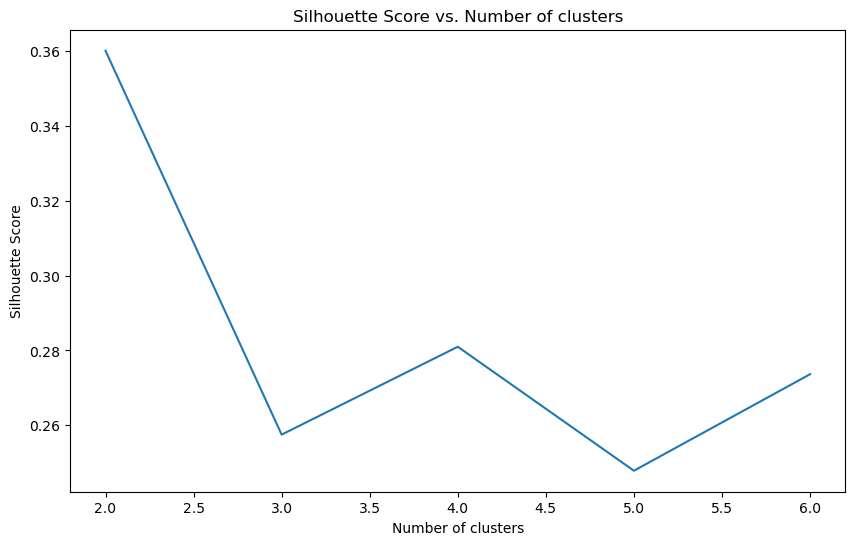

C:\Users\22970\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



cluster_means:
              CRIM         ZN      INDUS      CHAS       NOX        RM  \
cluster                                                                 
0        9.844730   0.000000  19.039718  0.067797  0.680503  5.967181   
1        0.261172  17.477204   6.885046  0.069909  0.487011  6.455422   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
cluster                                                                      
0        91.318079  2.007242  18.988701  605.858757  19.604520  301.331695   
1        56.339210  4.756868   4.471125  301.917933  17.837386  386.447872   

             LSTAT  
cluster             
0        18.572768  
1         9.468298  

centroids:
 [[ 0.72514566 -0.48772236  1.15311264 -0.00541237  1.086769   -0.45226302
   0.80876041 -0.8498651   1.0851445   1.1737306   0.53124811 -0.60679321
   0.82978746]
 [-0.39012396  0.26239167 -0.62036759  0.00291182 -0.58467512  0.24331476
  -0.43510819  0.45722226 -0.58380115 -0.63

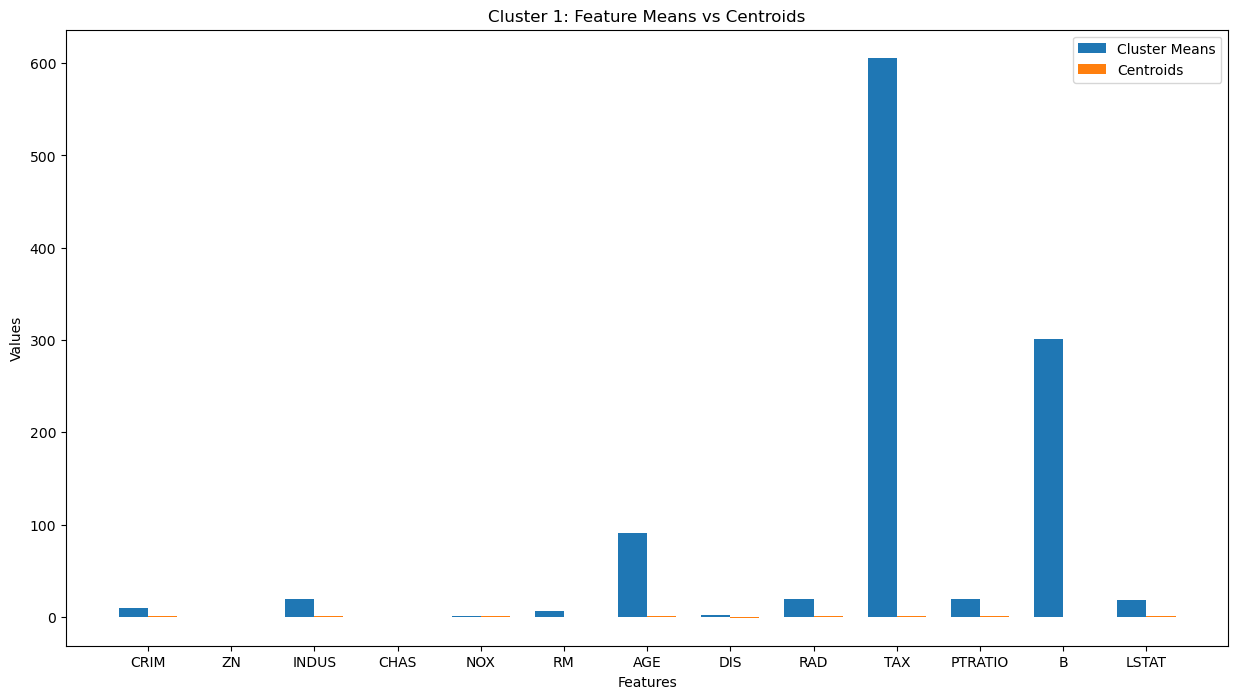

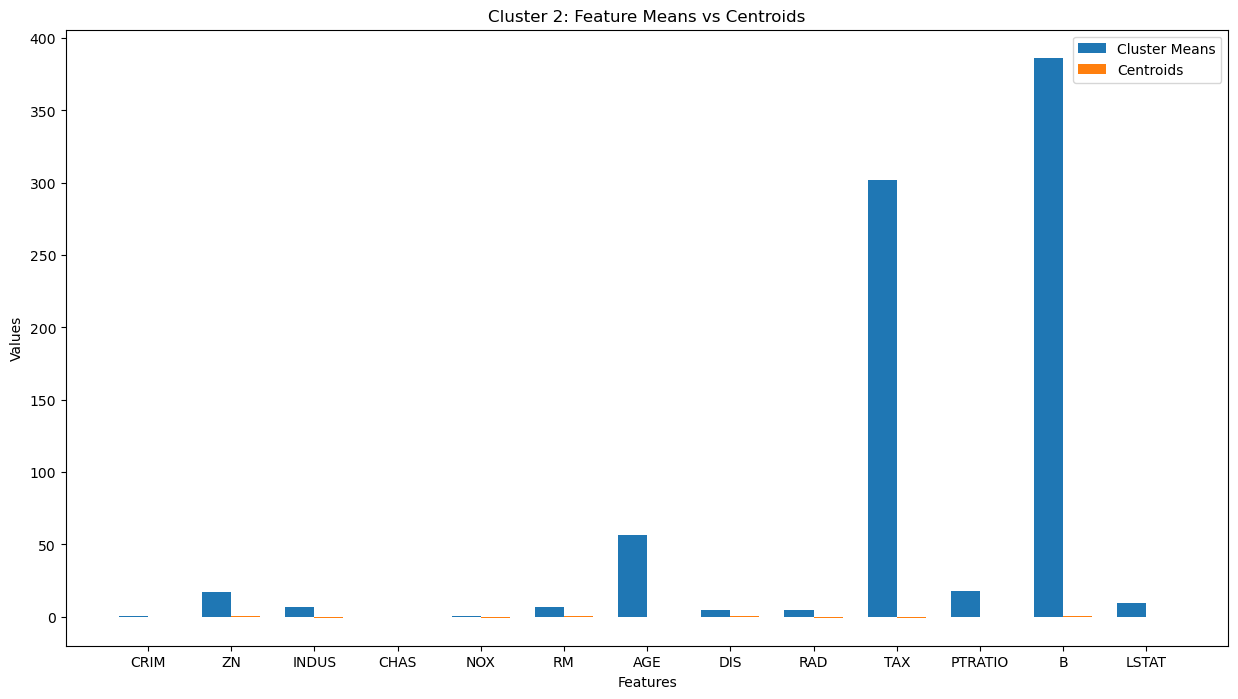

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_boston = pd.DataFrame(data, columns=feature_names)
scaler = StandardScaler()
scaled_boston = scaler.fit_transform(df_boston)
best_k = None
best_silhouette_score = -1
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, init='k-means++')
    kmeans.fit(scaled_boston)
    silhouette_avg = silhouette_score(scaled_boston, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k
print(f"best_k: {best_k}, best_silhouette_score: {best_silhouette_score}")
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores)
plt.title('Silhouette Score vs. Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
kmeans_best = KMeans(n_clusters=best_k, max_iter=300, n_init=10, init='k-means++')
kmeans_best.fit(scaled_boston)
df_boston['cluster'] = kmeans_best.labels_
cluster_means = df_boston.groupby('cluster').mean()
centroids = kmeans_best.cluster_centers_
print("\ncluster_means:\n", cluster_means)
print("\ncentroids:\n", centroids)
num_features = len(feature_names)
bar_width = 0.35
r1 = np.arange(num_features)
r2 = [x + bar_width for x in r1]
for cluster in range(best_k):
    plt.figure(figsize=(15, 8))
    plt.bar(r1, cluster_means.iloc[cluster], width=bar_width, label='Cluster Means')
    plt.bar(r2, centroids[cluster], width=bar_width, label='Centroids')
    plt.xticks([r + bar_width / 2 for r in range(num_features)], feature_names)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title(f'Cluster {cluster + 1}: Feature Means vs Centroids')
    plt.legend()
    plt.show()